In [2]:
%reset -f 
%matplotlib inline
import numpy as np
from matplotlib.animation import FuncAnimation
import os, sys, importlib, json, itertools
from datetime import datetime
from IPython.display import HTML, display
import matplotlib.image as mpimg
import pandas as pd

# Import the aif module
pwd = os.path.abspath('') + "/"
print(pwd)
sys.path.insert(1, pwd + '/aif_catkin_ws/aif_gazebo/scripts/simulation_methods')
import aif_functions_iterative_sampling as aif # Interchangeable with aif_functions_isobeliefs and aif_functions_isobeliefs_mcts
# import aif_catkin_ws.aif_gazebo.scripts.aif_functions_isobeliefs_adaptable as aif # Interchangeable with aif_functions_isobeliefs and aif_functions_isobeliefs_mcts
importlib.reload(aif)

import os
print(os.cpu_count())

c:\Users\jonat\OneDrive\Documents\Active_Inference\active_inference_playground\aif_multi_robot/


ModuleNotFoundError: No module named 'numba'

In [5]:
# Re-define the environment and simulation parameters here
interactive = True  # Set to True to display the animation in the notebook
fast_plot = True  # Set to True to plot the results faster
use_ep = True  # Set to True to use EP, False to use the standard algorithm
convergence_type = 'exclusive'  # Set to 'converge' to check for convergence, 'exclusive' to check for separate goals
args = {}
draft_results = []

env_size = 30  # Environment size
iterations_per_episode = 150  # Number of iterations per episode
number_of_heading_options = 8; number_of_velocity_options = 4
number_of_runs = 30
list_types = ['A','B']
for random_seed in range(number_of_runs):
    for num_agents in range(2,11):
        for num_goals in range(20,45,5):
            for use_ep in [True, False]:
                for greedy in [True, False]:
                    if greedy and not use_ep:
                        continue
                    # Set random seed
                    np.random.seed(random_seed)
                    env_size = num_agents*10
                    goals = np.random.uniform(1,env_size-1,size=(num_goals, 2))  # Goal positions
                    # goals = np.array([[0,0],[env_size-5,0]], dtype=float)  # Goal positions
                    agent_positions = np.hstack((np.ones((1,1))*(num_agents) + np.random.randn(num_agents,2), np.zeros((num_agents,1))))  # Initial agent positions
                    args = dict({
                        'goals': goals, # Goal positions
                        'home_base': np.array([0,0]), # Home base position
                        'agent_types': np.random.choice(list_types,num_agents), # Agent types
                        'agent_positions': agent_positions, # Initial agent positions
                        'velocity_options': np.linspace(0.1,1,number_of_velocity_options,endpoint=True), # Velocity options
                        'num_heading_options': number_of_heading_options, # Number of heading options
                        'heading_options': np.linspace(-np.pi/4,np.pi/4,number_of_heading_options,endpoint=True),
                        'observation_error_std': 0.5, # Observation error standard deviation
                        'num_actions': number_of_heading_options*number_of_velocity_options, # Number of actions
                        'env_size': env_size, # Environment size
                        'max_distance_measure': env_size + 20,
                        'max_heading_measure': np.pi, # Maximum heading measure
                        'prior': np.ones(agent_positions.shape[0]) / agent_positions.shape[0], # Prior belief
                        'use_ep': use_ep, # Use epistemic planning (2nd order reasoning)
                        'horizon': 5, # Horizon for free energy checking
                        'mcts_iterations': 100, # Number of MCTS iterations
                        'use_mcts': False,
                        'use_rhc': False,
                        'use_threading': False, #TODO: Implement threading
                        'greedy': greedy, # Greedy action selection
                        'convergence_type': convergence_type, # Convergence type
                        'dt': 1, # Time step
                        
                    })
                    reasoning_level = 2 if args['use_ep'] else 1
                    reasoning_level = 0 if args['greedy'] else reasoning_level
                    # tuple_elements = [i for i in range(agent_positions.shape[0])]
                    # configurations = list(itertools.permutations(tuple_elements))
                    # args['reward_configs'] = configurations # Reward configurations if different goals
                    # Run the simulation
                    results = aif.run_simulation(args, iterations_per_episode)
                    draft_results.append([random_seed, results['converged'], num_goals, num_agents, args['agent_types'], 
                                            use_ep,greedy,results['iteration'], reasoning_level])
    
                    print("-------------------")
                    print("\rSeed %d, Agents %d, Goals %d, EP %s, Greedy %s, Converged %s, Iteration %d" % 
                          (random_seed, num_agents, num_goals, use_ep, greedy, results['converged'], results['iteration']))
                    print("-------------------")

# Save the results
current_time = datetime.now().strftime("%Y%m%d-%H%M%S")
df = pd.DataFrame(draft_results, columns=['seed','converged','num_goals','num_agents','agent_types','use_ep','greedy','num_iters','reasoning_level'])    
df.to_csv(pwd + 'data/results_isobeliefs_envSize30_2-3Agents_numGoals20_IterativeGoals{}_epistemic_dt.csv'.format(current_time), index=False)


Iteration 34: Total execution time: 0.02s
Agents have converged after 34 iterations with average execution time of 0.0006219429128310259s.
-------------------
Seed 0, Agents 2, Goals 20, EP True, Greedy True, Converged True, Iteration 33
-------------------
Iteration 36: Total execution time: 1.09s
Agents have converged after 36 iterations with average execution time of 0.03030065033170912s.
-------------------
Seed 0, Agents 2, Goals 20, EP True, Greedy False, Converged True, Iteration 35
-------------------
Iteration 36: Total execution time: 0.37s
Agents have converged after 36 iterations with average execution time of 0.010204275449117025s.
-------------------
Seed 0, Agents 2, Goals 20, EP False, Greedy False, Converged True, Iteration 35
-------------------
Iteration 62: Total execution time: 0.03s
Agents have converged after 62 iterations with average execution time of 0.0004527145816433814s.
-------------------
Seed 0, Agents 2, Goals 25, EP True, Greedy True, Converged True, I

KeyboardInterrupt: 

In [6]:

# Save the results
current_time = datetime.now().strftime("%Y%m%d-%H%M%S")
df = pd.DataFrame(draft_results, columns=['seed','converged','num_goals','num_agents','agent_types','use_ep','greedy','num_iters','reasoning_level'])    
df.to_csv(pwd + 'data/results_isobeliefs_envSize30_2-3Agents_numGoals20_IterativeGoals{}_epistemic_dt.csv'.format(current_time), index=False)
# Create animation
# if not fast_plot:
#     completed_task_img = mpimg.imread('figures/puddle_icon.png')
#     not_completed_task_img = mpimg.imread('figures/fire_icon.png')
#     plt_sim = aif.PlotSim(num_agents, goals, args['agent_types'], completed_task_img, not_completed_task_img, env_size, padding=5, scale = 0.5)
# else:
#     plt_sim = aif.PlotSim_fast(num_agents, goals, args['agent_types'],env_size, padding=10, scale = 0.3)
# ani = FuncAnimation(plt_sim.fig, plt_sim.update, frames=range(results['iteration']), init_func=plt_sim.init, fargs = (results['plot_args'],), blit=True, repeat=True)

# # Save the animation as a video
# current_time = datetime.now().strftime("%Y%m%d-%H%M%S")
# config_file = ["numRobots", num_agents, "_numGoals", num_goals, "_seed", random_seed, "_EP", args['use_ep'], "_goalType", 
#                convergence_type, "_greedy", args['greedy'], "_envSize", env_size]
# config_file = ''.join([str(elem) for elem in config_file])
# if results['converged'] == None and not interactive:
    
#     filepath = pwd + "videos/NO_convergence_" + config_file + ".mp4"
#     ani.save(filepath, writer='ffmpeg', fps=3, dpi=300)
#     # Save location of the final image
#     print("Image saved as: ", filepath)
# elif not interactive:
#     filepath = pwd + "videos/Converged_" + config_file + ".mp4"
#     ani.save(filepath, writer='ffmpeg', fps=3, dpi=300)
#     # Save location of the final image
#     print("Image saved as: ", filepath)
# else:
#     display(HTML(ani.to_jshtml())) # Use an interactive backend for animation




In [40]:
print(random_seed)
print(num_agents)

0
2


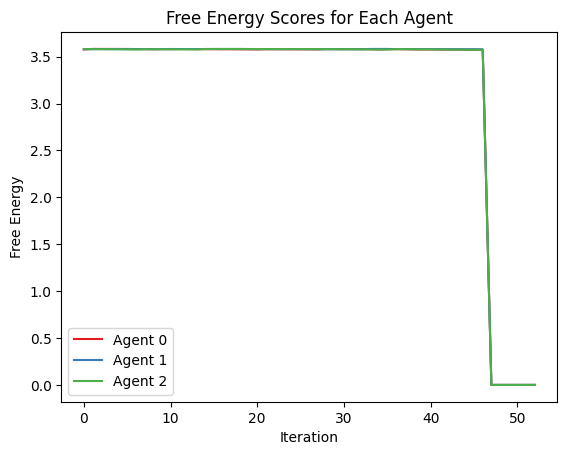

[(0, 1, 2), (0, 2, 1), (1, 0, 2), (1, 2, 0), (2, 0, 1), (2, 1, 0)]


In [95]:
avg_nrg_over_time = results['energy_scores']
num_frames = results['iteration']
energy_results, ending_energy = aif.parse_free_energy_scores(avg_nrg_over_time, num_frames)
aif.plot_energy(energy_results, num_agents)
print(args['reward_configs'])

In [ ]:
# Calculate distance to final goals
final_distances = np.zeros((num_agents, goals.shape[0]))
for i in range(num_agents):
    for j in range(goals.shape[0]):
        final_distances[i,j] = np.linalg.norm(results['positions'][i,:2] - goals[j,:])
print("Final distances: ", final_distances)


Final distances:  [[0.04272534 4.99155181]
 [0.04607108 5.04569454]]


In [27]:
# Scratch code for testing

goals = np.array([[0,0],[0.,10.]])
my_pose = np.array([0, 4])
other_pose = np.array([0, 5])
saliences = np.zeros(goals.shape[0])
goal_azimuths = np.arctan2(goals[:, 1] - my_pose[1], goals[:, 0] - my_pose[0])
observed_azimuth = np.arctan2(my_pose[1] - other_pose[1], my_pose[0] - other_pose[0])
relative_azimuths = np.abs((goal_azimuths - observed_azimuth + np.pi) % (2 * np.pi) - np.pi)
azimuth_salience = 1./8 * np.exp(- relative_azimuths / np.pi)  # normalize and invert to make smaller angles more salient
saliences += azimuth_salience
# Compute if observed robot is heading towards the goal
# heading_to_goal = (np.arctan2(goals[:, 1] - observation['position'][1], goals[:, 0] - observation['position'][0]) - observation['heading'] + np.pi) % (2 * np.pi) - np.pi
# heading_salience = 1./8 * np.exp(- np.abs(heading_to_goal) / np.pi)
# saliences += heading_salience


print("Goal Azimuth: ", goal_azimuths)
print("Relative Azimuth: ", azimuth_salience)
print("Observed Azimuth: ", observed_azimuth)
print("Salience: ", saliences)
# print("Heading Salience: ", heading_salience)
print(np.exp(0.8/np.pi))

Goal Azimuth:  [-1.57079633  1.57079633]
Relative Azimuth:  [0.125      0.04598493]
Observed Azimuth:  -1.5707963267948966
Salience:  [0.125      0.04598493]
1.2900073408606396


In [ ]:
poses = np.array([[0,0],[0,0]])+0.5
print(poses)
distance = sum(poses[i][dim] - poses[j][dim] for i in range(2) for j in range(2) if i != j for dim in range(2))
1e4 / (1+np.exp(100*(distance - 1.5)))

[[0.5 0.5]
 [0.5 0.5]]


10000.0

In [5]:
for use_ep in [True, False]:
    for greedy in [True, False]:

        print(use_ep, greedy)

True True
True False
False False
